<a href="https://colab.research.google.com/github/mayankawrr/EDA-Probability-Distributions/blob/main/Weak_Law_of_Large_Numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weak Law of Large Numbers

Let $X_1, X_2, \dots, X_n \sim \text{iid} \, X$ with expected value $\mathbb{E}[X] = \mu$ and variance $\text{Var}(X) = \sigma^2$.

Define the sample mean as:

$$
\bar{X} = \frac{X_1 + X_2 + \dots + X_n}{n}
$$

Then, by the Weak Law of Large Numbers, for any $\delta > 0$:

$$
P(|\bar{X} - \mu| > \delta) \leq \frac{\sigma^2}{n \delta^2}
$$

## Explanation
This inequality, derived from Chebyshev's inequality, shows that the probability of the sample mean $\bar{X}$ deviating from the true mean $\mu$ by more than $\delta$ decreases as the sample size $n$ increases. The term $\frac{\sigma^2}{n \delta^2}$ bounds this probability, indicating that the sample mean converges in probability to the true mean $\mu$ as $n \to \infty$.

But this info is not much useful in real life situation, because it uses Chebyshev's inequality and it is very loose (less accurate), and is better for general case

A better approach will be CLT which uses normal table ot give very tight and accurate bounds

# Central Limit Theorem

The **Central Limit Theorem (CLT)** is a fundamental concept in statistics and probability theory. It explains how the distribution of sample means approaches a normal distribution as the sample size increases, regardless of the original population's distribution.

## Key Statement of CLT
Let $X_1, X_2, \dots, X_n$ be a random sample of size $n$ from a population with mean $\mu$ and finite variance $\sigma^2$. The sample mean is $\bar{X} = \frac{1}{n} \sum_{i=1}^n X_i$.

As $n \to \infty$, the distribution of the standardized sample mean
$$
Z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}}
$$
approaches a standard normal distribution $N(0, 1)$.

In simpler terms:
- For large sample sizes (typically $n \geq 30$), the sampling distribution of the mean is approximately normal.
- This holds even if the population is not normally distributed.

## Assumptions
- The samples are independent and identically distributed (i.i.d.).
- The population has a finite mean and variance.
- Sample size is sufficiently large.

WLLN give us a guaranteed bound whereas CLT gives a precise confidence interval when we have some assumptions validated, large sample size, shape of distribution of sample mean, etc

CLT is much more accurate because it uses normal tables

In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohammadtalib786/retail-sales-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/retail-sales-dataset


In [12]:
import pandas as pd
sales = pd.read_csv(path+ "/retail_sales_dataset.csv")

In [24]:
sales.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


In [13]:
sales.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [16]:
sales['Date'].max()

'2024-01-01'

In [17]:
sales['Date'].min()

'2023-01-01'

This is sales data for one year

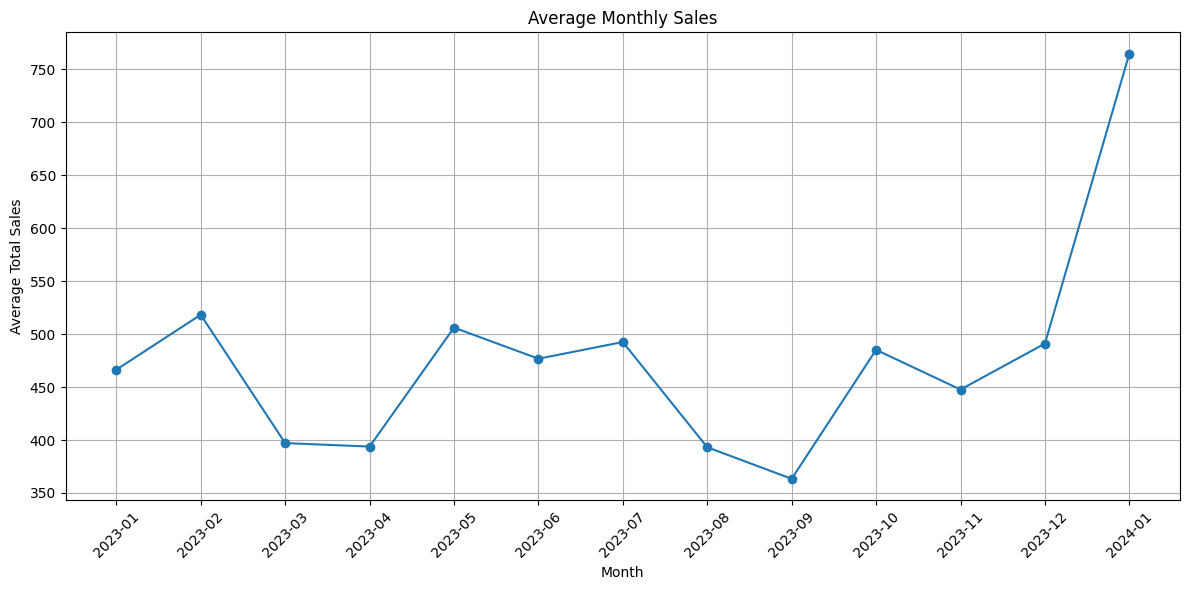

In [18]:
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime objects
sales['Date'] = pd.to_datetime(sales['Date'])

# Extract month from the 'Date' column
sales['Month'] = sales['Date'].dt.to_period('M')

# Group by month and calculate the average total sales
monthly_sales = sales.groupby('Month')['Total Amount'].mean().reset_index()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['Total Amount'], marker='o')
plt.xlabel('Month')
plt.ylabel('Average Total Sales')
plt.title('Average Monthly Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

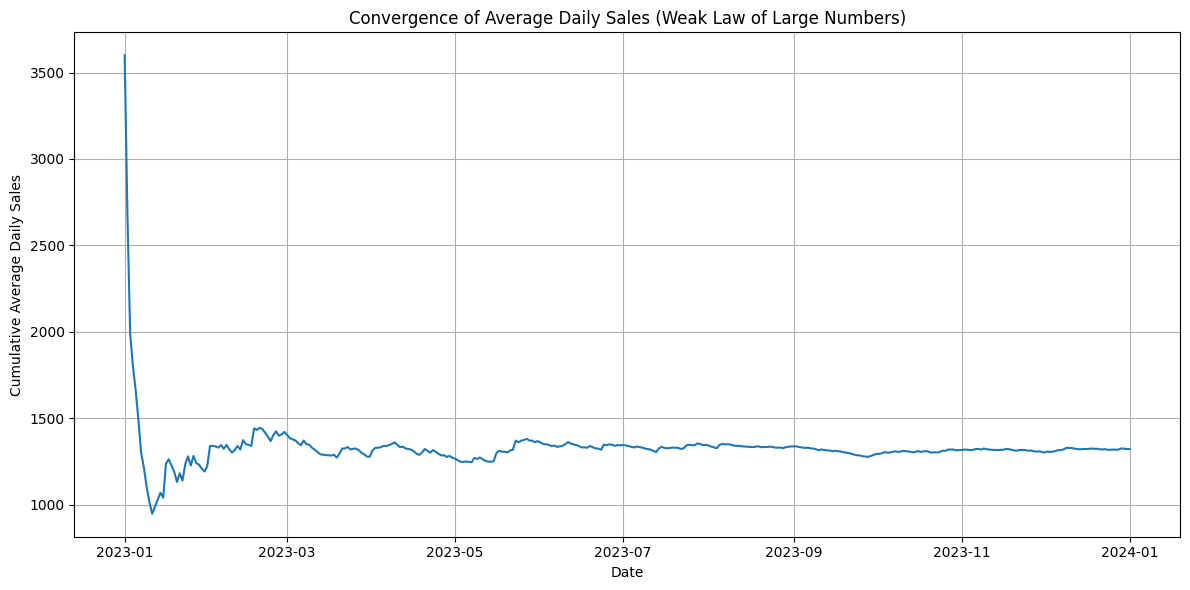

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Date' to datetime and group by date to get daily total sales
daily_sales = sales.groupby(sales['Date'].dt.date)['Total Amount'].sum().reset_index()
daily_sales.columns = ['Date', 'Daily Sales']

# Calculate the cumulative sum and cumulative count of daily sales
daily_sales['Cumulative Sales'] = daily_sales['Daily Sales'].cumsum()
daily_sales['Cumulative Count'] = daily_sales.reset_index().index + 1

# Calculate the cumulative average daily sales
daily_sales['Cumulative Average Sales'] = daily_sales['Cumulative Sales'] / daily_sales['Cumulative Count']

# Plot the cumulative average daily sales
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Cumulative Average Sales'])
plt.xlabel('Date')
plt.ylabel('Cumulative Average Daily Sales')
plt.title('Convergence of Average Daily Sales (Weak Law of Large Numbers)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
# Convert 'Date' column to datetime objects if not already
sales['Date'] = pd.to_datetime(sales['Date'])

# Group by date and calculate the average 'Total Amount' for each day
average_daily_transaction_amount = sales.groupby(sales['Date'].dt.date)['Total Amount'].mean().reset_index()
average_daily_transaction_amount.columns = ['Date', 'Average Transaction Amount']

# Display the resulting DataFrame
display(average_daily_transaction_amount)

,Date,Average Transaction Amount
0,2023-01-01,1200.000000
1,2023-01-02,441.250000
2,2023-01-03,600.000000
3,2023-01-04,413.333333
4,2023-01-05,366.666667
...,...,...
340,2023-12-27,350.000000
341,2023-12-28,691.666667
342,2023-12-29,850.000000
343,2023-12-31,50.000000


In [27]:
# Group by date to get daily total sales (if not already done)
# This is the same daily_sales series used in the WLLN plot
daily_sales = sales.groupby(sales['Date'].dt.date)['Total Amount'].sum()

# Calculate the overall average of the daily total sales
overall_average_daily_total_sales = daily_sales.mean()

# Print the result
print(f"The overall average of the daily total sales is: {overall_average_daily_total_sales:.2f}")

The overall average of the daily total sales is: 1321.74


We can see that it clearly matches the WLNN convergence curve, the average total sales is slowly reached to 1300

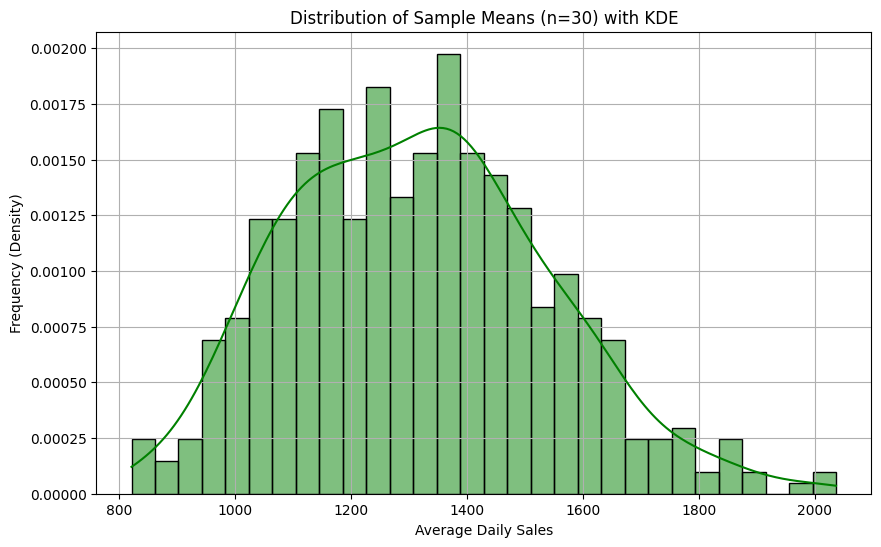

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn

# Group by date to get daily total sales
daily_sales = sales.groupby(sales['Date'].dt.date)['Total Amount'].sum()

# Set parameters for CLT demonstration
sample_size = 30  # Number of daily sales to include in each sample
num_samples = 500  # Number of samples to take

# Take multiple samples and calculate the mean of each sample
sample_means = [np.mean(daily_sales.sample(sample_size, replace=True)) for _ in range(num_samples)]

# Plot the distribution of the sample means
plt.figure(figsize=(10, 6))
sns.histplot(sample_means, bins=30, kde=True, color='g', stat='density') # Use seaborn for histplot with kde
plt.xlabel('Average Daily Sales')
plt.ylabel('Frequency (Density)')
plt.title(f'Distribution of Sample Means (n={sample_size}) with KDE') # Update title
plt.grid(True)
plt.show()

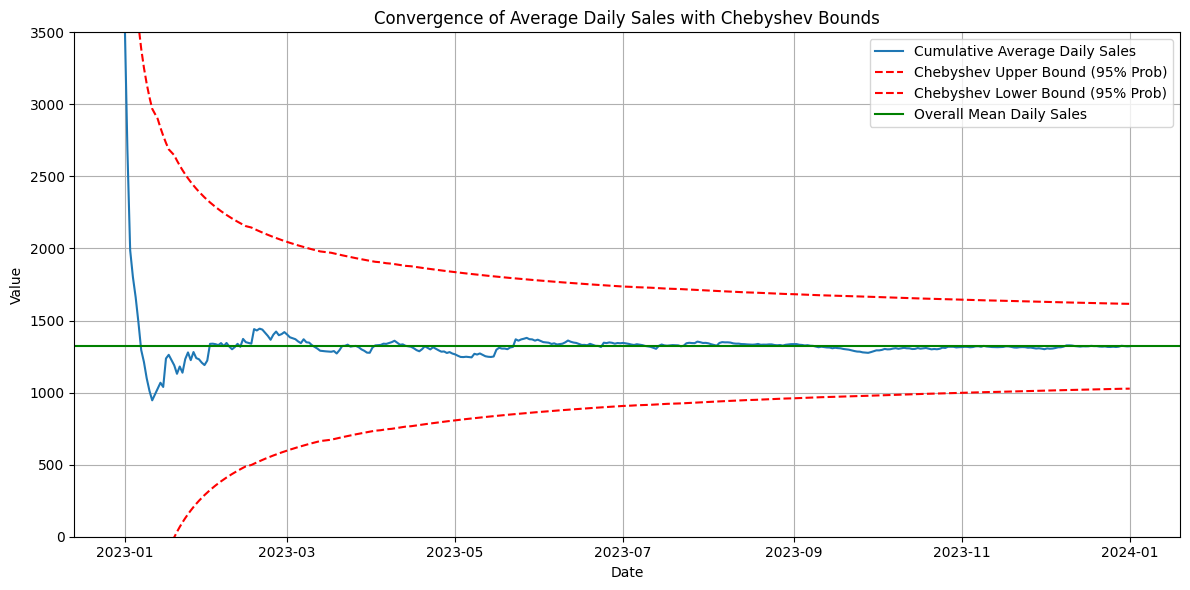

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # Import numpy

# Convert 'Date' to datetime and group by date to get daily total sales
daily_sales = sales.groupby(sales['Date'].dt.date)['Total Amount'].sum().reset_index()
daily_sales.columns = ['Date', 'Daily Sales']

# Calculate the cumulative sum and cumulative count of daily sales
daily_sales['Cumulative Sales'] = daily_sales['Daily Sales'].cumsum()
daily_sales['Cumulative Count'] = daily_sales.reset_index().index + 1

# Calculate the cumulative average daily sales
daily_sales['Cumulative Average Sales'] = daily_sales['Cumulative Sales'] / daily_sales['Cumulative Count']

# Calculate the overall mean and variance of the daily total sales
overall_mean_daily_sales = daily_sales['Daily Sales'].mean()
overall_variance_daily_sales = daily_sales['Daily Sales'].var()

# Define a small probability bound (alpha)
alpha = 0.05 # We want the probability of deviation > delta to be <= alpha

# Calculate the delta required to achieve this probability bound at each step
# delta^2 >= sigma^2 / (n * alpha)  => delta >= sqrt(sigma^2 / (n * alpha))
# We will plot mu +/- delta
daily_sales['Chebyshev_Delta'] = np.sqrt(overall_variance_daily_sales / (daily_sales['Cumulative Count'] * alpha))

# Calculate the upper and lower bounds based on the calculated delta
daily_sales['Chebyshev_Upper_Bound'] = overall_mean_daily_sales + daily_sales['Chebyshev_Delta']
daily_sales['Chebyshev_Lower_Bound'] = overall_mean_daily_sales - daily_sales['Chebyshev_Delta']


# Plot the cumulative average daily sales and the Chebyshev bounds
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Cumulative Average Sales'], label='Cumulative Average Daily Sales')
plt.plot(daily_sales['Date'], daily_sales['Chebyshev_Upper_Bound'], label=f'Chebyshev Upper Bound ({1-alpha:.0%} Prob)', color='red', linestyle='--') # Plot the upper bound
plt.plot(daily_sales['Date'], daily_sales['Chebyshev_Lower_Bound'], label=f'Chebyshev Lower Bound ({1-alpha:.0%} Prob)', color='red', linestyle='--') # Plot the lower bound

plt.axhline(y=overall_mean_daily_sales, color='green', linestyle='-', label='Overall Mean Daily Sales') # Add a line for the overall mean

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Convergence of Average Daily Sales with Chebyshev Bounds')
plt.legend() # Add a legend
plt.grid(True)
plt.ylim(0, 3500) # Keep the y-axis limits for better visualization
plt.tight_layout()
plt.show()

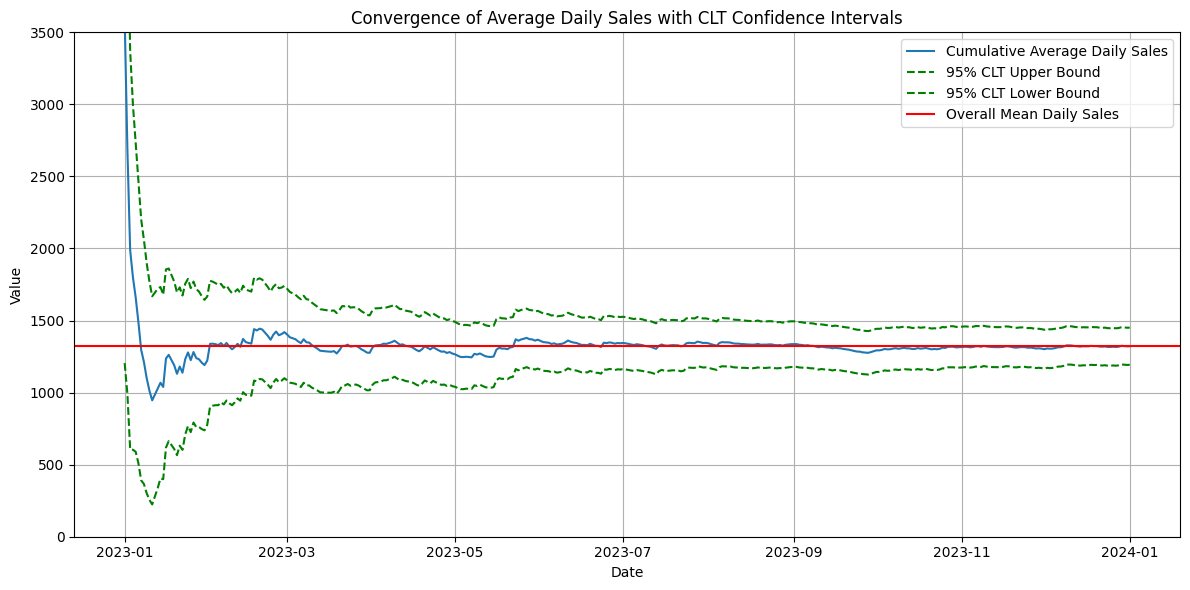

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm # Import norm for z-score

# Ensure daily_sales DataFrame is available (assuming it was created earlier)
# If not, recreate it:
# Group by date to get daily total sales
daily_sales = sales.groupby(sales['Date'].dt.date)['Total Amount'].sum().reset_index()
daily_sales.columns = ['Date', 'Daily Sales']

# Calculate the cumulative sum and cumulative count of daily sales
daily_sales['Cumulative Sales'] = daily_sales['Daily Sales'].cumsum()
daily_sales['Cumulative Count'] = daily_sales.reset_index().index + 1

# Calculate the cumulative average daily sales
daily_sales['Cumulative Average Sales'] = daily_sales['Cumulative Sales'] / daily_sales['Cumulative Count']

# Calculate the overall mean and standard deviation of the daily total sales
overall_mean_daily_sales = daily_sales['Daily Sales'].mean()
overall_std_daily_sales = daily_sales['Daily Sales'].std()

# Define the confidence level (e.g., 95%)
confidence_level = 0.95
alpha = 1 - confidence_level

# Get the z-score for the desired confidence level
# For a two-tailed interval, we need the z-score for alpha/2
z_score = norm.ppf(1 - alpha/2)

# Calculate the standard error of the mean at each step
# Standard Error = Population Standard Deviation / sqrt(n)
# We use the overall sample standard deviation as an estimate for the population standard deviation
daily_sales['Standard_Error'] = overall_std_daily_sales / np.sqrt(daily_sales['Cumulative Count'])

# Calculate the margin of error at each step
daily_sales['Margin_of_Error'] = z_score * daily_sales['Standard_Error']

# Calculate the upper and lower bounds of the confidence interval
daily_sales['CLT_Upper_Bound'] = daily_sales['Cumulative Average Sales'] + daily_sales['Margin_of_Error']
daily_sales['CLT_Lower_Bound'] = daily_sales['Cumulative Average Sales'] - daily_sales['Margin_of_Error']

# Plot the cumulative average daily sales and the CLT confidence bounds
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Cumulative Average Sales'], label='Cumulative Average Daily Sales')
plt.plot(daily_sales['Date'], daily_sales['CLT_Upper_Bound'], label=f'{confidence_level:.0%} CLT Upper Bound', color='green', linestyle='--') # Plot the upper bound
plt.plot(daily_sales['Date'], daily_sales['CLT_Lower_Bound'], label=f'{confidence_level:.0%} CLT Lower Bound', color='green', linestyle='--') # Plot the lower bound

plt.axhline(y=overall_mean_daily_sales, color='red', linestyle='-', label='Overall Mean Daily Sales') # Add a line for the overall mean

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Convergence of Average Daily Sales with CLT Confidence Intervals')
plt.legend() # Add a legend
plt.grid(True)
plt.ylim(0, 3500) # Keep the y-axis limits consistent for comparison
plt.tight_layout()
plt.show()

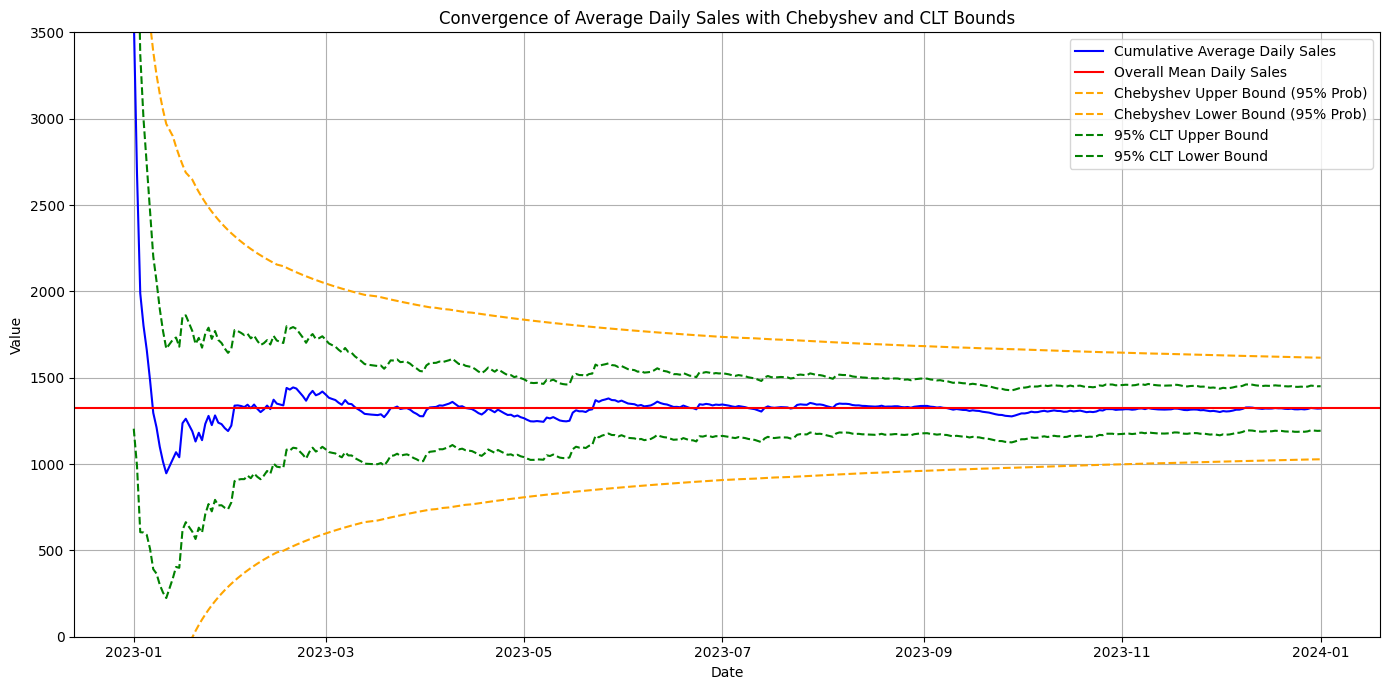

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm

# Ensure daily_sales DataFrame is available (assuming it was created earlier)
# If not, recreate it:
daily_sales = sales.groupby(sales['Date'].dt.date)['Total Amount'].sum().reset_index()
daily_sales.columns = ['Date', 'Daily Sales']

# Calculate the cumulative sum and cumulative count of daily sales
daily_sales['Cumulative Sales'] = daily_sales['Daily Sales'].cumsum()
daily_sales['Cumulative Count'] = daily_sales.reset_index().index + 1

# Calculate the cumulative average daily sales
daily_sales['Cumulative Average Sales'] = daily_sales['Cumulative Sales'] / daily_sales['Cumulative Count']

# Calculate the overall mean and variance/std deviation of the daily total sales
overall_mean_daily_sales = daily_sales['Daily Sales'].mean()
overall_variance_daily_sales = daily_sales['Daily Sales'].var()
overall_std_daily_sales = daily_sales['Daily Sales'].std()


# --- Chebyshev Bounds Calculation ---
# Define a small probability bound (alpha) for Chebyshev
alpha_chebyshev = 0.05 # We want the probability of deviation > delta to be <= alpha

# Calculate the delta required to achieve this probability bound at each step
# delta >= sqrt(sigma^2 / (n * alpha))
daily_sales['Chebyshev_Delta'] = np.sqrt(overall_variance_daily_sales / (daily_sales['Cumulative Count'] * alpha_chebyshev))

# Calculate the upper and lower bounds based on the calculated delta
daily_sales['Chebyshev_Upper_Bound'] = overall_mean_daily_sales + daily_sales['Chebyshev_Delta']
daily_sales['Chebyshev_Lower_Bound'] = overall_mean_daily_sales - daily_sales['Chebyshev_Delta']


# --- CLT Bounds Calculation ---
# Define the confidence level (e.g., 95%) for CLT
confidence_level_clt = 0.95
alpha_clt = 1 - confidence_level_clt

# Get the z-score for the desired confidence level
z_score = norm.ppf(1 - alpha_clt/2)

# Calculate the standard error of the mean at each step
daily_sales['Standard_Error'] = overall_std_daily_sales / np.sqrt(daily_sales['Cumulative Count'])

# Calculate the margin of error at each step
daily_sales['Margin_of_Error'] = z_score * daily_sales['Standard_Error']

# Calculate the upper and lower bounds of the confidence interval
daily_sales['CLT_Upper_Bound'] = daily_sales['Cumulative Average Sales'] + daily_sales['Margin_of_Error']
daily_sales['CLT_Lower_Bound'] = daily_sales['Cumulative Average Sales'] - daily_sales['Margin_of_Error']


# --- Combined Plot ---
plt.figure(figsize=(14, 7))

# Plot Cumulative Average
plt.plot(daily_sales['Date'], daily_sales['Cumulative Average Sales'], label='Cumulative Average Daily Sales', color='blue')

# Plot Overall Mean
plt.axhline(y=overall_mean_daily_sales, color='red', linestyle='-', label='Overall Mean Daily Sales')

# Plot Chebyshev Bounds
plt.plot(daily_sales['Date'], daily_sales['Chebyshev_Upper_Bound'], label=f'Chebyshev Upper Bound ({1-alpha_chebyshev:.0%} Prob)', color='orange', linestyle='--')
plt.plot(daily_sales['Date'], daily_sales['Chebyshev_Lower_Bound'], label=f'Chebyshev Lower Bound ({1-alpha_chebyshev:.0%} Prob)', color='orange', linestyle='--')

# Plot CLT Bounds
plt.plot(daily_sales['Date'], daily_sales['CLT_Upper_Bound'], label=f'{confidence_level_clt:.0%} CLT Upper Bound', color='green', linestyle='--')
plt.plot(daily_sales['Date'], daily_sales['CLT_Lower_Bound'], label=f'{confidence_level_clt:.0%} CLT Lower Bound', color='green', linestyle='--')


plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Convergence of Average Daily Sales with Chebyshev and CLT Bounds')
plt.legend()
plt.grid(True)
plt.ylim(0, 3500) # Keep the y-axis limits consistent
plt.tight_layout()
plt.show()